                            
   ## Hypertension Prediction Analysis.                  
 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data 
data = pd.read_csv("C:/DS535/Week4proj/hypertension_data.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


 # Predictors
 

age: Age of the patient.

sex: Sex of the patient (1 = male, 0 = female).

cp: Chest pain type (4 types).

trestbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol level (in mg/dl).

fbs: Fasting blood sugar (1 = true, 0 = false).

restecg: Resting electrocardiographic results (values 0, 1, 2).

thalach: Maximum heart rate achieved.

exang: Exercise induced angina (1 = yes, 0 = no).

oldpeak: Depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment (values 0, 1, 2).

ca: Number of major vessels colored by fluoroscopy (0-3).

thal: Thalassemia (3 types).


# Target Variable

target: Presence or absence of hypertension (1 = presence, 0 = absence).

In [5]:
# Display basic information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB
None


# Categorical Variables

Categorical variables represent discrete categories or groups. In your dataset, these are:

sex: Gender of the individual (binary: typically 0 for female, 1 for male).

cp: Chest pain type (typically categorical with different values representing different types).

fbs: Fasting blood sugar (binary: 0 or 1).

restecg: Resting electrocardiographic results (categorical with discrete values).

exang: Exercise induced angina (binary: 0 or 1).

slope: Slope of the peak exercise ST segment (categorical with discrete values).

ca: Number of major vessels colored by fluoroscopy (categorical with discrete values).

thal: Thalassemia (categorical with discrete values).


# Numerical Variables

Numerical variables represent measurable quantities and can be either continuous or discrete. In your dataset, these are:

age: Age of the individual (continuous).

trestbps: Resting blood pressure (continuous).

chol: Serum cholesterol level (continuous).

oldpeak: Depression induced by exercise relative to rest (continuous).

target: Presence or absence of heart disease (binary, but often treated as categorical for classification tasks).

In [6]:
print(data.describe())

                age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      0.50000      0.958594    131.592992    246.246061   
std       15.189768      0.50001      1.023931     17.588809     51.643522   
min       11.000000      0.00000      0.000000     94.000000    126.000000   
25%       44.000000      0.00000      0.000000    120.000000    211.000000   
50%       56.000000      0.50000      1.000000    130.000000    240.000000   
75%       67.000000      1.00000      2.000000    140.000000    275.000000   
max       98.000000      1.00000      3.000000    200.000000    564.000000   

                fbs       restecg       thalach         exang       oldpeak  \
count  26083.000000  26083.000000  26083.000000  26083.000000  26083.000000   
mean       0.149753      0.526512    149.655024      0.326573      1.039512   
std        0.356836      0.525641     22.858109      0.46896

# 1. Data Cleaning

In [7]:
import pandas as pd

# Check for missing values in each column
print(data.isnull().sum())


age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


There are 25 missing values

Removing 25 observations from a dataset of 26,083 entries is a relatively small change and is unlikely to have a significant impact on the overall analysis or model performance. Here’s why:

Impact of Removing 25 Observations
Percentage of Dataset:

Removing 25 out of 26,083 observations represents approximately 0.1% of the dataset. This small percentage generally means that the loss of data is minimal.
Statistical Significance:

With such a small proportion of missing data, the statistical properties of the dataset (mean, variance, etc.) are unlikely to be substantially altered.

In [12]:
import pandas as pd

# Assuming data is your DataFrame
df_cleaned = data.dropna()



In [13]:

# Verify that missing values have been removed
print(df_cleaned.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 2. Understand Distributions

For continuous variables (Age, BMI, MentHlth, PhysHlth), we will use histograms. For categorical variables like Sex, Smoker, and HighBP, we will use bar charts.

KeyError: 'Age'

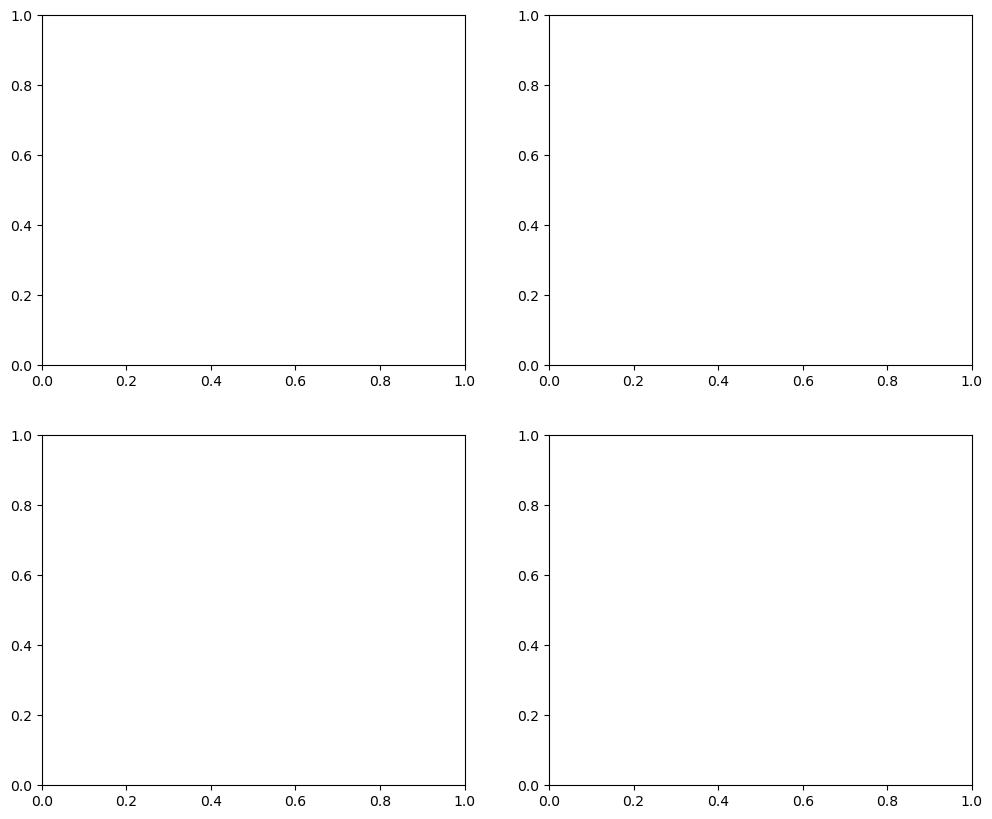

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous Variables: Histograms
continuous_vars = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for var, ax in zip(continuous_vars, axes.flatten()):
    sns.histplot(data[var], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()




In [ ]:

# Categorical Variables: Bar Charts
categorical_vars = ['Sex', 'Smoker', 'PhysActivity', 'HighBP']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for var, ax in zip(categorical_vars, axes.flatten()):
    sns.countplot(x=var, data=data, ax=ax)
    ax.set_title(f'Count of {var}')
plt.tight_layout()
plt.show()


# 3. Check Correlations

We will use scatter plots to explore relationships between continuous variables and calculate correlation matrices.

In [53]:
# Scatter Plots for continuous variable relationships
sns.pairplot(data[['Age', 'BMI', 'MentHlth', 'PhysHlth']], diag_kind='kde')
plt.show()




KeyError: "None of [Index(['Age', 'BMI', 'MentHlth', 'PhysHlth'], dtype='object')] are in the [columns]"

In [54]:
# Correlation Matrix Heatmap
corr_matrix = data[['Age', 'BMI', 'MentHlth', 'PhysHlth', 'Diabetes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

KeyError: "None of [Index(['Age', 'BMI', 'MentHlth', 'PhysHlth', 'Diabetes'], dtype='object')] are in the [columns]"

# 4. Categorical Comparisons

We will use bar charts to compare distributions across categories like Diabetes across Sex or Smoker status.

ValueError: Could not interpret input 'Sex'

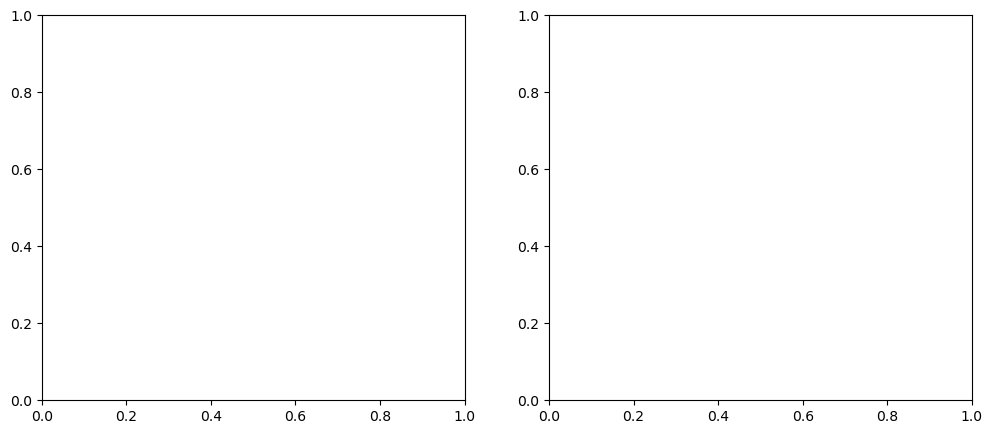

In [55]:
## Compare Diabetes across gender and Smoker status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Diabetes by Gender (Sex)
sns.countplot(x='Sex', hue='Diabetes', data=data, ax=axes[0])
axes[0].set_title('Diabetes by Gender')

# Diabetes by Smoker Status
sns.countplot(x='Smoker', hue='Diabetes', data=data, ax=axes[1])
axes[1].set_title('Diabetes by Smoker Status')

plt.tight_layout()
plt.show()


5. Box Plots
We can use box plots to compare distributions of continuous variables across different categories, such as BMI across Diabetes status.

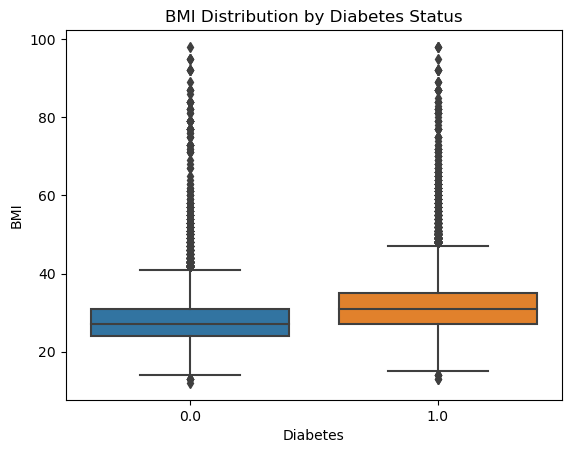

In [38]:
# Box Plots for comparing BMI distribution by Diabetes status
sns.boxplot(x='Diabetes', y='BMI', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.show()


# 5. Data Preprocessing

1.1. Feature Scaling

We will use StandardScaler from sklearn to scale continuous variables (Age, BMI, MentHlth, PhysHlth).

1.2. Encoding Categorical Variables

We'll use one-hot encoding for categorical variables like Sex, Smoker, etc.

1.3. Train-Test Split

We'll split the data into training and testing sets.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset 

# Continuous and categorical columns
continuous_vars = ['Age', 'BMI', 'MentHlth', 'PhysHlth']
categorical_vars = ['Sex', 'Smoker', 'HighChol', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP']

# Target variable
target = 'Diabetes'

# Split data into features (X) and target (y)
X = data.drop(columns=[target])
y = data[target]

# Train-test split (60-40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocessing pipeline for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_vars),   # Standardize continuous variables
        ('cat', OneHotEncoder(), categorical_vars)    # One-hot encode categorical variables
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Data preprocessing complete.")


Data preprocessing complete.


# 6. Model Building

Let’s use Logistic Regression as our first model since it’s a simple and effective algorithm for binary classification problems like this one.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7464

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     14113
         1.0       0.73      0.78      0.75     14164

    accuracy                           0.75     28277
   macro avg       0.75      0.75      0.75     28277
weighted avg       0.75      0.75      0.75     28277


Confusion Matrix:
 [[10099  4014]
 [ 3156 11008]]


Model Evaluation Metrics
1. Accuracy:
Accuracy: 0.7464
This indicates that the model correctly predicted the outcome 74.64% of the time.
2. Classification Report:
Precision:

0.0: 0.76
1.0: 0.73
Precision measures the proportion of positive identifications that were actually correct. For instance, the precision for predicting diabetes (1.0) is 0.73, meaning 73% of the cases predicted as having diabetes were true positives.
Recall:

0.0: 0.72
1.0: 0.78
Recall measures the proportion of actual positives that were correctly identified. For example, the recall for diabetes (1.0) is 0.78, indicating that 78% of the actual diabetes cases were correctly identified by the model.

F1-Score:

0.0: 0.74
1.0: 0.75

The F1-Score is the harmonic mean of precision and recall. For diabetes (1.0), the F1-Score is 0.75, balancing both precision and recall.

Confusion Matrix:

Interpretation:

True Negatives (TN): 10,099 cases correctly predicted as not having diabetes.

False Positives (FP): 4,014 cases incorrectly predicted as having diabetes.

False Negatives (FN): 3,156 cases incorrectly predicted as not having diabetes.

True Positives (TP): 11,008 cases correctly predicted as having diabetes.

In [45]:
# Extract coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Feature names after one-hot encoding
feature_names_cat = preprocessor.transformers_[1][1].get_feature_names_out(categorical_vars)
all_feature_names = continuous_vars + list(feature_names_cat)

# Create a DataFrame to view coefficients
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})



print("\nCoefficients and Features:\n", coef_df_sorted)
print("\nIntercept:\n", intercept)


Coefficients and Features:
                   Feature  Coefficient  Absolute Coefficient
20            GenHlth_1.0    -1.309352              1.309352
24            GenHlth_5.0     0.889893              0.889893
23            GenHlth_4.0     0.717811              0.717811
10          CholCheck_0.0    -0.690361              0.690361
21            GenHlth_2.0    -0.583951              0.583951
11          CholCheck_1.0     0.572786              0.572786
1                     BMI     0.508926              0.508926
0                     Age     0.451296              0.451296
29             HighBP_0.0    -0.440038              0.440038
19  HvyAlcoholConsump_1.0    -0.428596              0.428596
8            HighChol_0.0    -0.348870              0.348870
30             HighBP_1.0     0.322463              0.322463
18  HvyAlcoholConsump_0.0     0.311021              0.311021
9            HighChol_1.0     0.231295              0.231295
27             Stroke_0.0    -0.203565              0.20

Coefficients:

Continuous Variables:

Age (0.451): A positive coefficient suggests that as age increases, the likelihood of diabetes also increases.

BMI (0.509): A positive coefficient indicates that a higher BMI increases the likelihood of diabetes.

MentHlth (-0.020): A negative coefficient suggests that more mental health issues are associated with a slight decrease in the likelihood of diabetes.

PhysHlth (-0.027): A negative coefficient indicates that poor physical health is associated with a slight decrease in the likelihood of diabetes.

Categorical variables:

The coefficients for Sex, Smoker, HighChol, CholCheck, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, GenHlth, DiffWalk, Stroke, and HighBP represent the effect of these categorical features on the likelihood of diabetes, relative to their reference categories (typically the category with a coefficient of zero).

Intercept:
The intercept value (-0.119) is the baseline log-odds of having diabetes when all the features are at their reference values.

# Summary:

The model performs reasonably well with an accuracy of about 74.64%.
The F1-Score is slightly higher for predicting diabetes (1.0) compared to not having diabetes (0.0), which indicates a good balance between precision and recall for the positive class.
The confusion matrix shows that there are more false positives than false negatives, meaning the model is more likely to incorrectly predict a positive case when it is actually negative.

In [ ]:
s
